In [ ]:
import pandas as pd
import numpy as np
from functools import  singledispatch
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from importlib import reload
import eval_funcs
import ALA_helpers
from scipy.stats import skew
from matplotlib.patheffects import Stroke, Normal
import matplotlib.colors as plt_c
import os


##this is for colormap warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
SAVE_FIG = False

In [3]:
df_exp_data = pd.read_csv("single_mut_effects.csv")

In [4]:
df_reruns = pd.read_csv("ala_scanning_combined_0623.csv")
# Add mutation index to the reruns dataframe
df_reruns_mut_added =  ALA_helpers._add_mutation_idxed(df_reruns)
cols_to_drop = ALA_helpers._df_drop_helper(df_reruns_mut_added) #drops var 
df_reruns_mut_added.drop(columns=cols_to_drop, inplace=True)
df_reruns_mut_added = df_reruns_mut_added.sort_values(by="mutation_idxed", ignore_index=True)
codensed_col_names = ALA_helpers._condense_col_names(df_reruns_mut_added.columns.to_numpy())
df_reruns_mut_added.rename(columns=dict(zip(df_reruns_mut_added.columns, codensed_col_names)), inplace=True) #just to get shorter col names
num_data_full = df_reruns_mut_added
full_data_df = ALA_helpers.add_exp_data(num_data_full, df_exp_data)
full_data_df_bd_site = ALA_helpers.add_binding_site_bool(full_data_df)


columns_of_interest = ["ddg_gb_5_mbondi2", "ddg_gb_66_mbondi2", "ddg_pb_mbondi2", "ddg_exp"]
colors_for_cols = [ "gb5_mbondi2", "gb6_mbondi" , "pb" , "exp"]
data_set_names = ["pb", "gb5_mbondi", "gb5_opt1", "gb5_opt5", "gb6_mbondi", "gb6_opt1", "gb6_opt5", "exp"]

colormap = plt.cm.get_cmap("viridis", len(data_set_names))

colors = {name: colormap(i) for i, name in enumerate(data_set_names)} #our color dict
sample_colors=  [ colors[key] for key in data_set_names]

\begin{tabular}{lrrrr}
\toprule
 & PPRM & mean & p_skewness & std \\
\midrule
$\Delta \Delta G_{\text{bind}}$ GB5 Mbondi2 BD & 0.07 & -0.39 & -5.07 & 1.56 \\
$\Delta \Delta G_{\text{bind}}$ GB66 Mbondi2 BD & 0.12 & -0.36 & -5.64 & 1.58 \\
$\Delta \Delta G_{\text{bind}}$ PB Mbondi2 BD & 0.40 & -0.14 & -3.71 & 1.52 \\
$\Delta \Delta G_{\text{bind}}$ Experimental BD & 0.01 & -1.00 & -2.10 & 1.51 \\
$\Delta \Delta G_{\text{bind}}$ GB5 Mbondi2 N-BS & 0.38 & -0.02 & -7.12 & 0.33 \\
$\Delta \Delta G_{\text{bind}}$ GB66 Mbondi2 N-BS & 0.42 & -0.02 & -4.19 & 0.36 \\
$\Delta \Delta G_{\text{bind}}$ PB Mbondi2 N-BS & 0.54 & 0.04 & -0.27 & 0.93 \\
$\Delta \Delta G_{\text{bind}}$ Experimental N-BS & 0.01 & -0.99 & -2.16 & 1.54 \\
$\Delta \Delta G_{\text{bind}}$ GB5 Mbondi2 BS & 0.00 & -3.54 & -1.17 & 3.50 \\
$\Delta \Delta G_{\text{bind}}$ GB66 Mbondi2 BS & 0.01 & -3.27 & -1.44 & 3.79 \\
$\Delta \Delta G_{\text{bind}}$ PB Mbondi2 BS & 0.12 & -1.68 & -1.61 & 3.59 \\
$\Delta \Delta G_{\text{bind}}$ E

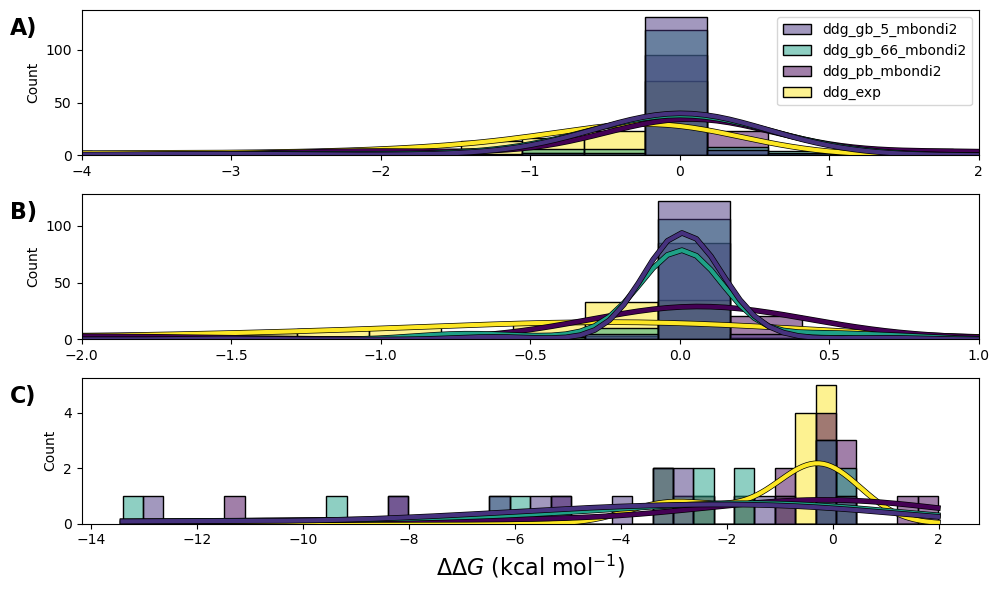

In [5]:

columns_of_interest = ["ddg_gb_5_mbondi2", "ddg_gb_66_mbondi2", "ddg_pb_mbondi2", "ddg_exp"]
tmp_df = full_data_df_bd_site[columns_of_interest].copy()

colors_for_cols = [ "gb5_mbondi", "gb6_mbondi" , "pb" , "exp"]
sub_set_sample_colors=  [ colors[key] for key in colors_for_cols]
fig, ax =plt.subplots(figsize=(10, 6), nrows=3, ncols=1)



sns.histplot(tmp_df, bins=40, palette=sub_set_sample_colors, 
             kde=True, line_kws={"linewidth": 3, "path_effects": [Stroke(linewidth=4, foreground='black'), Normal()]},  ax=ax[0], legend=True)
sns.histplot(tmp_df[full_data_df_bd_site["bd_site"] == False], bins=40, palette=sub_set_sample_colors, 
             kde=True, line_kws={"linewidth": 3, "path_effects": [Stroke(linewidth=4, foreground='black'), Normal()]},  ax=ax[1], legend=False)
sns.histplot(tmp_df[full_data_df_bd_site["bd_site"] == True], bins=40, palette=sub_set_sample_colors, 
             kde=True, line_kws={"linewidth": 3,  
                      "path_effects": [Stroke(linewidth=4, foreground='black'), Normal()]},  ax=ax[2], legend=False)

ax[0].set_xlim(-4, 2)
ax[1].set_xlim(-2, 1)



ax[0].text(-0.08, 0.95, "A)", fontsize=16, fontweight='bold', va='top', ha='left', transform=ax[0].transAxes)
ax[1].text(-0.08, 0.95, "B)", fontsize=16, fontweight='bold', va='top', ha='left', transform=ax[1].transAxes)
ax[2].text(-0.08, 0.95, "C)", fontsize=16, fontweight='bold', va='top', ha='left', transform=ax[2].transAxes)

ax[2].set_xlabel(r"$\Delta\Delta G$ (kcal mol$^{-1}$)", fontsize = 16)
plt.tight_layout()


data_features_df = ALA_helpers.calculate_features(full_data_df_bd_site.copy(), columns_of_interest)
ddg_str = r"$\Delta \Delta G_{\text{bind}}$"
col_name_mapper = {"ddg_gb_5_mbondi2" : f"{ddg_str} GB5 Mbondi2 BD" ,
			"ddg_gb_66_mbondi2" : f"{ddg_str} GB66 Mbondi2 BD" ,
			"ddg_pb_mbondi2" :  f"{ddg_str} PB Mbondi2 BD" ,
			"ddg_exp" :  f"{ddg_str} Experimental BD" ,
			"ddg_gb_5_mbondi2_NBS" :  f"{ddg_str} GB5 Mbondi2 N-BS" ,
			"ddg_gb_66_mbondi2_NBS" : f"{ddg_str} GB66 Mbondi2 N-BS" ,
			"ddg_pb_mbondi2_NBS" :f"{ddg_str} PB Mbondi2 N-BS" ,
			"ddg_exp_NBS" : f"{ddg_str} Experimental N-BS" ,
			"ddg_gb_5_mbondi2_BS" : f"{ddg_str} GB5 Mbondi2 BS" ,
			"ddg_gb_66_mbondi2_BS" : f"{ddg_str} GB66 Mbondi2 BS", 
			'ddg_pb_mbondi2_BS': f"{ddg_str} PB Mbondi2 BS" ,
			"ddg_exp_BS": f"{ddg_str} Experimental BS" }

data_features_df_renamed = (data_features_df.T).rename(columns=col_name_mapper)


ALA_helpers._df_to_latex_cust(data_features_df_renamed.drop(labels=["median", "mode"], axis='index', ).T, bold=False)

if SAVE_FIG==True:
	plt.savefig(os.path.join('sample_figs', 'histogram_plot_ALA_scanning_Mbondi.png'), dpi=300, bbox_inches='tight')

\begin{tabular}{lrrrr}
\toprule
 & PPRM & mean & p_skewness & std \\
\midrule
$\Delta \Delta G_{\text{bind}}$ GB66 Mbondi2 BD & 0.12 & -0.36 & -5.64 & 1.58 \\
$\Delta \Delta G_{\text{bind}}$ GB66 OPT1 BD & 0.11 & -0.45 & -6.11 & 2.07 \\
$\Delta \Delta G_{\text{bind}}$ GB66 OPT5D BD & 0.13 & -0.45 & -6.11 & 2.19 \\
$\Delta \Delta G_{\text{bind}}$ Experimental BD & 0.01 & -1.00 & -2.10 & 1.51 \\
$\Delta \Delta G_{\text{bind}}$ GB66 Mbondi2 N-BS & 0.42 & -0.02 & -4.19 & 0.36 \\
$\Delta \Delta G_{\text{bind}}$ GB66 OPT1 N-BS & 0.40 & -0.03 & -4.94 & 0.40 \\
$\Delta \Delta G_{\text{bind}}$ GB66 OPT5D N-BS & 0.45 & -0.02 & -4.09 & 0.40 \\
$\Delta \Delta G_{\text{bind}}$ Experimental N-BS & 0.01 & -0.99 & -2.16 & 1.54 \\
$\Delta \Delta G_{\text{bind}}$ GB66 Mbondi2 BS & 0.01 & -3.27 & -1.44 & 3.79 \\
$\Delta \Delta G_{\text{bind}}$ GB66 OPT1 BS & 0.02 & -4.07 & -1.56 & 5.20 \\
$\Delta \Delta G_{\text{bind}}$ GB66 OPT5D BS & 0.03 & -4.26 & -1.53 & 5.51 \\
$\Delta \Delta G_{\text{bind}}$ Experi

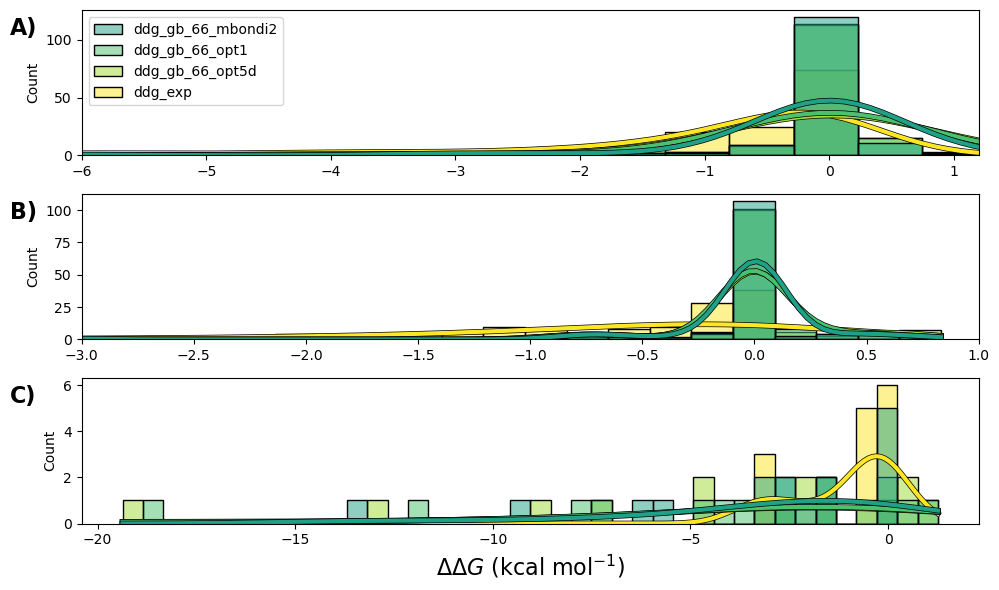

In [6]:

columns_of_interest = ["ddg_gb_66_mbondi2", "ddg_gb_66_opt1", "ddg_gb_66_opt5d", "ddg_exp"]
colors_for_cols = [ "gb6_mbondi", "gb6_opt1" , "gb6_opt5" , "exp"]
tmp_df = full_data_df_bd_site[columns_of_interest].copy()


sub_set_sample_colors=  [ colors[key] for key in colors_for_cols]
fig, ax =plt.subplots(figsize=(10, 6), nrows=3, ncols=1)

sns.histplot(tmp_df, bins=40, palette=sub_set_sample_colors, 
             kde=True, line_kws={"linewidth": 3, "path_effects": [Stroke(linewidth=4, foreground='black'), Normal()]},  ax=ax[0], legend=True)
sns.histplot(tmp_df[full_data_df_bd_site["bd_site"] == False], bins=40, palette=sub_set_sample_colors, 
             kde=True, line_kws={"linewidth": 3, "path_effects": [Stroke(linewidth=4, foreground='black'), Normal()]},  ax=ax[1], legend=False)
sns.histplot(tmp_df[full_data_df_bd_site["bd_site"] == True], bins=40, palette=sub_set_sample_colors, 
             kde=True, line_kws={"linewidth": 3,  
                      "path_effects": [Stroke(linewidth=4, foreground='black'), Normal()]},  ax=ax[2], legend=False)
ax[0].set_xlim(-6, 1.2)
ax[1].set_xlim(-3, 1)


# ax[0].legend( [col.replace("ddg", r"$\Delta\Detla G$") for col in tmp_df.columns if "ddg" in col])

ax[0].text(-0.08, 0.95, "A)", fontsize=16, fontweight='bold', va='top', ha='left', transform=ax[0].transAxes)
ax[1].text(-0.08, 0.95, "B)", fontsize=16, fontweight='bold', va='top', ha='left', transform=ax[1].transAxes)
ax[2].text(-0.08, 0.95, "C)", fontsize=16, fontweight='bold', va='top', ha='left', transform=ax[2].transAxes)

ax[2].set_xlabel(r"$\Delta\Delta G$ (kcal mol$^{-1}$)", fontsize = 16)
plt.tight_layout()


data_features_df = ALA_helpers.calculate_features(full_data_df_bd_site.copy(), columns_of_interest)
ddg_str = r"$\Delta \Delta G_{\text{bind}}$"
col_name_mapper2 = {'ddg_gb_66_mbondi2' : f"{ddg_str} GB66 Mbondi2 BD", 
		'ddg_gb_66_opt1' : f"{ddg_str} GB66 OPT1 BD", 
		'ddg_gb_66_opt5d' : f"{ddg_str} GB66 OPT5D BD",
		'ddg_exp': f"{ddg_str} Experimental BD",
		'ddg_gb_66_mbondi2_NBS' : f"{ddg_str} GB66 Mbondi2 N-BS", 
		'ddg_gb_66_opt1_NBS' : f"{ddg_str} GB66 OPT1 N-BS", 
		'ddg_gb_66_opt5d_NBS' : f"{ddg_str} GB66 OPT5D N-BS",
		'ddg_exp_NBS' : f"{ddg_str} Experimental N-BS",
		'ddg_gb_66_mbondi2_BS' : f"{ddg_str} GB66 Mbondi2 BS", 
		'ddg_gb_66_opt1_BS' : f"{ddg_str} GB66 OPT1 BS",
		'ddg_gb_66_opt5d_BS': f"{ddg_str} GB66 OPT5D BS",
		'ddg_exp_BS': f"{ddg_str} Experimental BS"}
data_features_df_renamed2 = (data_features_df.T).rename(columns=col_name_mapper2)

ALA_helpers._df_to_latex_cust(data_features_df_renamed2.drop(labels=["median", "mode"], axis='index', ).T, bold=False)

if SAVE_FIG==True:
	plt.savefig(os.path.join("sample_figs","histogram_plot_ALA_scanning_diff_radii.png"), dpi=300, bbox_inches='tight')


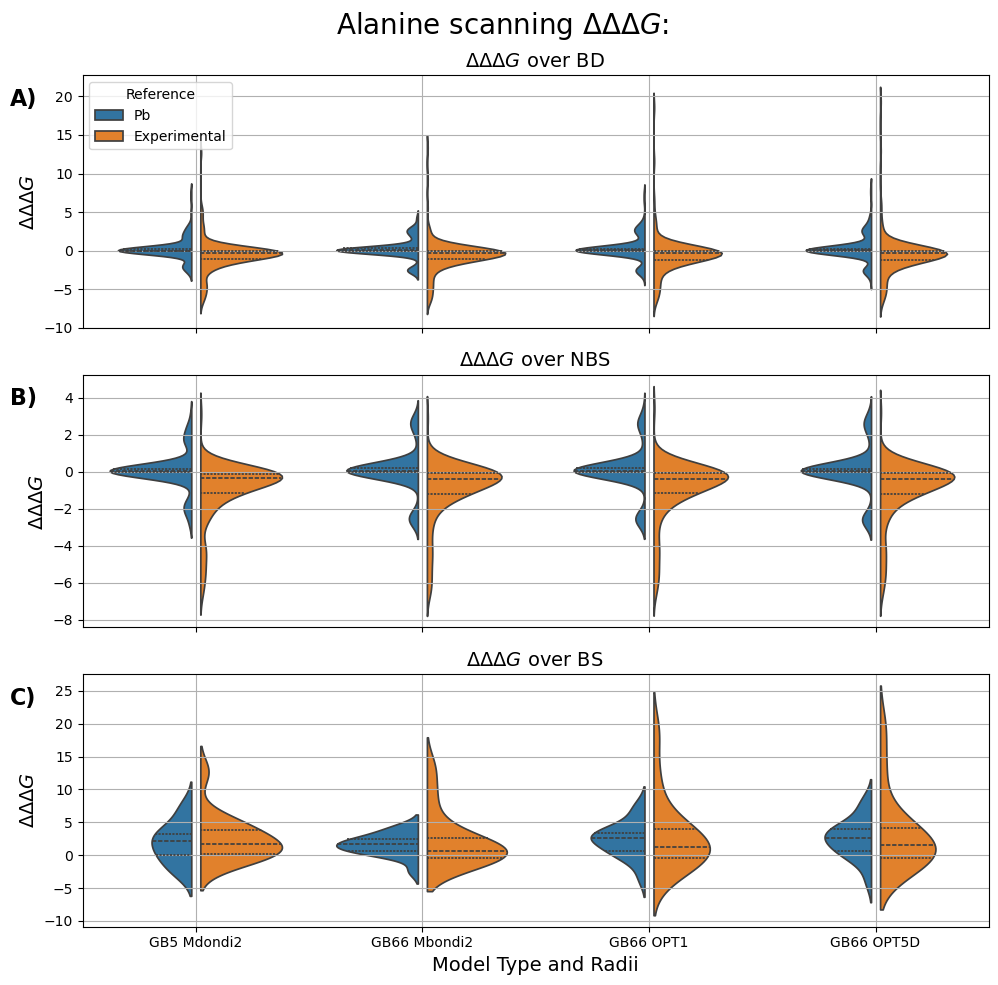

In [7]:
full_data_df_bd_site.columns

data_cols = ['ddg_gb_5_mbondi2', 
             'ddg_gb_66_mbondi2', 
       'ddg_gb_66_opt1',
       'ddg_gb_66_opt5d']
reference_col = ['ddg_exp',  'ddg_pb_mbondi2']

empty_df = pd.DataFrame()

for col in reference_col:
	for data_col in data_cols:
		if col == "ddg_exp":
			ref_name = "exp"
		else : 
			ref_name = "pb"
			
		empty_df[data_col + "_vs_" + ref_name] = full_data_df_bd_site[col] - full_data_df_bd_site[data_col]
  
reduced_df = empty_df
melded_df = pd.melt(reduced_df, value_vars=reduced_df.columns, var_name="comparison", value_name="ddg_diff")

# melded_df
melded_df["ref"] = [str_tmp.split("_")[-1] == "exp" for str_tmp in melded_df["comparison"].to_numpy()]

updated_comp_names = ["_".join(str_tmp.split("_")[:-2]) for str_tmp in melded_df["comparison"].to_numpy()]
melded_df["comparison"] = updated_comp_names





fig, ax = plt.subplots(figsize=(10, 10), nrows=3, ncols=1)
sns.violinplot(data=melded_df, x="comparison", y="ddg_diff", hue="ref", split=True, inner="quart", gap=.1, legend=False, ax=ax[0])

#have to add empty legends for the dotted lines.... 
ax[0].legend(title="Reference", handles=ax[0].legend_, labels=['Pb',"_","_", "_", 'Experimental'], loc="upper left")
ax[0].set_ylabel(r"$\Delta\Delta\Delta G$ ", fontsize=14)
ax[0].set_xlabel("Model Type", fontsize=14)
ax[0].set_title(r"Alanine scanning $\Delta\Delta G$ comparison to experimental and Pb data", fontsize=16)

data_cols = ['ddg_gb_5_mbondi2', 
             'ddg_gb_66_mbondi2', 
				'ddg_gb_66_opt1',
				'ddg_gb_66_opt5d']
reference_col = ['ddg_exp',  'ddg_pb_mbondi2']

empty_df = pd.DataFrame()

for col in reference_col:
	for data_col in data_cols:
		if col == "ddg_exp":
			ref_name = "exp"
		else : 
			ref_name = "pb"
			
		empty_df[data_col + "_vs_" + ref_name] = full_data_df_bd_site[col] - full_data_df_bd_site[data_col]
  
reduced_df = empty_df
reduced_df["bd_site"] = full_data_df_bd_site["bd_site"]

melded_df = pd.melt(reduced_df, value_vars=reduced_df.columns, 
                    var_name="comparison",
                    value_name="ddg_diff",
                    id_vars="bd_site")

melded_df["ref"] = [str_tmp.split("_")[-1] == "exp" for str_tmp in melded_df["comparison"].to_numpy()]

updated_comp_names = ["_".join(str_tmp.split("_")[:-2]) for str_tmp in melded_df["comparison"].to_numpy()]
melded_df["comparison"] = updated_comp_names


bd_site_idxer = melded_df["bd_site"]==True
non_bd_site_idxer = melded_df["bd_site"]==False

idx_arrs = [bd_site_idxer, non_bd_site_idxer]
idx_names = ["bd_site", "non_bd_site"]


idx_val = 2
for idx, idx_name in zip(idx_arrs, idx_names):
	sns.violinplot(data=melded_df[idx], x="comparison", y="ddg_diff", hue="ref", split=True, inner="quart", gap=.1, legend=False, ax=ax[idx_val] )
	#have to add empty legends for the dotted lines.... 
	# ax[idx_val].set_ylabel(r"$\Delta\Delta G$", fontsize=14)
	
	ax[idx_val].set_ylabel(r"$\Delta\Delta\Delta G$ ", fontsize=14)
	# plt.savefig(f'violin_plot_ddg_comparison_{idx_name}.png', dpi=300, bbox_inches='tight')
	idx_val = idx_val  -1 
 
 
 
plt.suptitle(r"Alanine scanning $\Delta\Delta\Delta G$: ", fontsize=20)
ax[0].set_title(r"$\Delta\Delta\Delta G$ over BD " ,fontsize=14)
ax[1].set_title(r"$\Delta\Delta\Delta G$ over NBS " ,fontsize=14)
ax[2].set_title(r"$\Delta\Delta\Delta G$ over BS " ,fontsize=14)
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].set_xticklabels([])
ax[0].set_xlabel("")
ax[1].set_xticklabels([])
ax[1].set_xlabel("")
ax[2].set_xticklabels(["GB5 Mdondi2", "GB66 Mbondi2", "GB66 OPT1", "GB66 OPT5D"])
ax[2].set_ylabel(r"$\Delta\Delta\Delta G$", fontsize=14)
ax[2].set_xlabel("Model Type and Radii", fontsize=14)

ax[0].text(-0.08, 0.95, "A)", fontsize=16, fontweight='bold', va='top', ha='left', transform=ax[0].transAxes)
ax[1].text(-0.08, 0.95, "B)", fontsize=16, fontweight='bold', va='top', ha='left', transform=ax[1].transAxes)
ax[2].text(-0.08, 0.95, "C)", fontsize=16, fontweight='bold', va='top', ha='left', transform=ax[2].transAxes)




plt.tight_layout()
SAVE_FIG = True
if SAVE_FIG == True:
	plt.savefig(os.path.join("sample_figs","error_vio_plot.png"), dpi=300, bbox_inches='tight')

In [8]:
reload(ALA_helpers)
tmp_table_call = ALA_helpers.table_gen_rmse_corr_bounds(full_data_df_bd_site)

In [9]:
reload(ALA_helpers)
exp_ref_df, pb_ref_df = ALA_helpers.table_gen_rmse_corr_bounds(full_data_df_bd_site, split_by_pb=True)

In [10]:
ALA_helpers._df_to_latex_cust(exp_ref_df.T)

\begin{tabular}{lrrr}
\toprule
Model & GB5 Mbondi2 & GB66 Mbondi2 & PB \\
\midrule
RMSE $\Delta \Delta  \Delta G_{\text{bind,exp}}$ BD  & \textbf{2.17} & 2.27 & 2.37 \\
mean $\Delta \Delta  \Delta G_{\text{bind,exp}}$ BD & -0.61 & -0.64 & \textbf{-0.86} \\
corr $\Delta \Delta  \Delta G_{\text{bind,exp}}$ BD & 0.08 & 0.01 & \textbf{-0.07} \\
RMSE of worst 20\% $\Delta \Delta  \Delta G_{\text{bind,exp}}$ BD & \textbf{4.66} & 4.90 & 4.92 \\
RMSE $\Delta \Delta  \Delta G_{\text{bind,exp}}$ N-BS & \textbf{1.80} & 1.85 & 2.10 \\
mean $\Delta \Delta  \Delta G_{\text{bind,exp}}$ N-BS & -0.97 & -0.97 & \textbf{-1.03} \\
corr $\Delta \Delta  \Delta G_{\text{bind,exp}}$ N-BS & 0.14 & -0.01 & \textbf{-0.04} \\
RMSE of worst 20\% $\Delta \Delta  \Delta G_{\text{bind,exp}}$ N-BS & \textbf{3.86} & 3.95 & 4.31 \\
RMSE  $\Delta \Delta  \Delta G_{\text{bind,exp}}$ BS & 4.14 & 4.47 & \textbf{4.00} \\
mean  $\Delta \Delta  \Delta G_{\text{bind,exp}}$ BS & 2.49 & 2.22 & \textbf{0.62} \\
corr  $\Delta \Delt

In [11]:
ALA_helpers._df_to_latex_cust(pb_ref_df.T.drop(columns=["PB"]))

\begin{tabular}{lrr}
\toprule
Model & GB5 Mbondi2 & GB66 Mbondi2 \\
\midrule
RMSE $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BD & 1.45 & \textbf{1.31} \\
mean $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BD & 0.25 & \textbf{0.22} \\
corr $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BD & \textbf{0.57} & 0.65 \\
RMSE of worst 20\% $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BD & 3.09 & \textbf{2.75} \\
RMSE $\Delta \Delta  \Delta G_{\text{bind,PB}}$ N-BS & \textbf{0.97} & 1.15 \\
mean $\Delta \Delta  \Delta G_{\text{bind,PB}}$  N-BS & \textbf{0.06} & 0.06 \\
corr $\Delta \Delta  \Delta G_{\text{bind,PB}}$  N-BS & 0.05 & \textbf{-0.50} \\
RMSE of worst 20\% $\Delta \Delta  \Delta G_{\text{bind,PB}}$ N-BS & \textbf{2.11} & 2.54 \\
RMSE $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BS & 3.50 & \textbf{2.27} \\
mean $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BS & 1.87 & \textbf{1.59} \\
corr $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BS & \textbf{0.63} & 0.90 \\
RMSE of worst 20\% $\Delta \Delta  \D

In [12]:
reload(ALA_helpers)
exp_ref_df, pb_ref_df = ALA_helpers.full_radii_table_gen_mu_rmse(full_data_df_bd_site, split_by_pb=True)

In [13]:
ALA_helpers._df_to_latex_cust(pb_ref_df.T.drop(columns=["PB"]))

\begin{tabular}{lrrrr}
\toprule
Model & GB5 Mbondi2 & GB66 Mbondi2 & GB66  OPT1 & GB66  OPT5D \\
\midrule
RMSE $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BD & 1.45 & \textbf{1.31} & 1.57 & 1.66 \\
mean $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BD & 0.25 & \textbf{0.22} & 0.31 & 0.32 \\
PCC $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BD & \textbf{0.57} & 0.65 & 0.67 & 0.66 \\
RMSE of worst 20\% $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BD & 3.09 & \textbf{2.75} & 3.29 & 3.50 \\
RMSE $\Delta \Delta  \Delta G_{\text{bind,PB}}$ N-BS & \textbf{0.97} & 1.15 & 1.16 & 1.17 \\
mean $\Delta \Delta  \Delta G_{\text{bind,PB}}$ N-BS & 0.06 & 0.06 & 0.07 & \textbf{0.06} \\
PCC $\Delta \Delta  \Delta G_{\text{bind,PB}}$ N-BS & 0.05 & \textbf{-0.50} & -0.45 & -0.48 \\
RMSE of worst 20\% $\Delta \Delta  \Delta G_{\text{bind,PB}}$ N-BS & \textbf{2.11} & 2.54 & 2.57 & 2.59 \\
mean $\Delta \Delta  \Delta G_{\text{bind,PB}}$ BS & 1.87 & \textbf{1.59} & 2.40 & 2.58 \\
RMSE $\Delta \Delta  \Delta G_{\text{b